In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib
import re
from datetime import datetime
from wordcloud import WordCloud 
import jieba
import jieba.analyse
from datetime import date
import re
import string
from wordcloud import WordCloud 

In [41]:
import requests

In [42]:
url="https://api.qsearch.cc/api/trend/v1/posts?st=2022-11-09&et=2022-11-10&channels=[%22FORUM%22]&q=[%22%E8%80%B3%E6%A9%9F%22]&nation=TW&limit=1000&offset=0&key=c6efaa5ab04ddc241dd5cd7a80f0d6eaf5d21f69cdce596944292a12bdf0147b"

In [46]:
re = requests.get(url) 
data = re.json()
print(data)

{'q': ['耳機'], 'et': '2022-11-10', 'data': [{'forum_raw': [{'boo_count': None, 'pid': '6693274', 'created_time': '2022-11-10 09:48:00 CST+0800', 'neutral_score': None, 'category': 'Computers Electronics and Technology/Social Networks and Online Communities', 'index': 'forum-2022', 'title': '鐵三角 ATH-CC500BT 軟骨傳導耳機｜音質與通話抑噪兼具的開放聆聽體驗！', 'site_code': 'mobile01', 'ts': 1668044880000.0, 'content': '希望在享受音樂的同時專注於周邊動靜的聽者，對骨傳導耳機一詞想必不陌生，但就在上個月初，日本耳機大廠鐵三角 Audio-Technica 公開了全球首款「軟骨傳導耳機」ATH-CC500BT，透過全新技...', 'comment_count': 348, 'ts_iso_8601': '2022-11-10T09:48:00+08:00', 'board': '行動影音', 'media_type': 'mobile01', 'net_score': None, 'negative_score': None, 'board_name': '行動影音', 'neutral': None, 'positive_score': None, 'label_sentiment': None, 'dif_count': None, 'permalink': 'https://www.mobile01.com/topicdetail.php?f=180&t=6693274', 'url': 'https://www.mobile01.com/topicdetail.php?f=180&t=6693274', 'push': None, 'zh_site_name': 'Mobile01'}, {'boo_count': None, 'pid': '240467690', 'created_time': '2

In [48]:
(data).keys()

dict_keys(['q', 'et', 'data', 'st'])

In [51]:
data['data']

[{'forum_raw': [{'boo_count': None,
    'pid': '6693274',
    'created_time': '2022-11-10 09:48:00 CST+0800',
    'neutral_score': None,
    'category': 'Computers Electronics and Technology/Social Networks and Online Communities',
    'index': 'forum-2022',
    'title': '鐵三角 ATH-CC500BT 軟骨傳導耳機｜音質與通話抑噪兼具的開放聆聽體驗！',
    'site_code': 'mobile01',
    'ts': 1668044880000.0,
    'content': '希望在享受音樂的同時專注於周邊動靜的聽者，對骨傳導耳機一詞想必不陌生，但就在上個月初，日本耳機大廠鐵三角 Audio-Technica 公開了全球首款「軟骨傳導耳機」ATH-CC500BT，透過全新技...',
    'comment_count': 348,
    'ts_iso_8601': '2022-11-10T09:48:00+08:00',
    'board': '行動影音',
    'media_type': 'mobile01',
    'net_score': None,
    'negative_score': None,
    'board_name': '行動影音',
    'neutral': None,
    'positive_score': None,
    'label_sentiment': None,
    'dif_count': None,
    'permalink': 'https://www.mobile01.com/topicdetail.php?f=180&t=6693274',
    'url': 'https://www.mobile01.com/topicdetail.php?f=180&t=6693274',
    'push': None,
    'zh_site_name': 'Mobile01'},
   {

## 資料

合併資料集

關鍵字 :
和泰汽車、中華賓士、汎德永業、太古汽車、匯豐汽車、中華汽車、福特六和、台灣本田、鴻華先進、國瑞汽車、三陽工業

In [2]:
df_1 = pd.read_csv('./explore/FB_ci-1.csv')
df_2 = pd.read_csv('./explore/FB_ci-2.csv')
df_3 = pd.read_csv('./explore/FB_ci-3.csv')
df_ = pd.concat([df_1,df_2,df_3],axis=0)
df_.drop(['dataSource', 'reaction_wow_count', 'reaction_haha_count',
       'ig_username', 'n', 'reaction_all_count', 'reaction_haha',
       'reaction_love', 'reaction_like', 'reaction_like_count',
       'engagement_score', 'reaction_sad_count', 'website', 'type',
       'share_count', 'fromid', 'follower_count', 'followers_count',
       'reaction_love_count', 'commentcount',
       'talking_about_count', 'fromname_t', 'fan_count', 'reaction_angry',
       'reaction_sad', 'reaction_angry_count', 'message', 'created_time',
       'sharecount', 'reaction_wow', 'reaction_all'], axis=1, inplace=True)
df_ = df_[~df_.artUrl.duplicated()]
df_.drop(['system_id'], axis=1, inplace=True)
df_.reset_index()
print(df_.shape)
df_.head()

(13395, 6)


artDate                                           artUrl  \
0  2022-08-24 02:29:31      https://fb.com/202188887719_616801973140620   
1  2022-01-21 03:00:11  https://fb.com/447419565442617_1140278863466705   
2  2022-07-29 11:00:04  https://fb.com/388034991650151_1484409492012690   
3  2022-09-02 04:00:01  https://fb.com/388034991650151_1507184333068539   
4  2022-08-24 11:00:01  https://fb.com/388034991650151_1501810126939293   

                     artPosterUrl  artPoster  \
0     https://fb.com/202188887719        高嘉瑜   
1  https://fb.com/447419565442617    momo購物台   
2  https://fb.com/388034991650151  Volvo 商用車   
3  https://fb.com/388034991650151  Volvo 商用車   
4  https://fb.com/388034991650151  Volvo 商用車   

                                          artContent  comment_count  
0  \n第七屆內科千人捐血活動今天開始\n猜猜+<><在哪裡🫣\n\n「內科千人捐血活動」\n地...            146  
1  momo購物台 was live.\n一把車鑰匙+一支手機安心上路守護🚘\n太古汽車最新服務...            209  
2  【Volvo x 敏揚． #賀交車 攜手創造競爭力！】\n　\n 🎉．全．台．首．輛．FMX...              7  
3  【Volvo商用車 冷卻、冷氣與輪軸系統免費預防檢查x限定活動！】🎁\n#粉絲團限定 #夏日...             67  
4  【Volvo x 敏揚．最堅強的後盾、最有力的夥伴 】\n#我們不只交車也交心\n　\n「有...             11

In [3]:
pf_poster = pd.DataFrame(df_.groupby("artPoster")['artPoster'].count())
print(len(pf_poster))
pf_poster.artPoster.sort_values(ascending=False)[:50]

1969


artPoster
永晟車業【SBC經銷商】                           526
台灣賓士授權經銷商-中華賓士                         492
Yahoo奇摩汽車機車                            480
U-CAR網路汽車共和國                           415
李政峰の匯豐汽車粉絲團                            356
udn發燒車訊                                343
匯豐汽車桃園營業所                              262
KingAutos 國王車訊                         247
自由時報汽車頻道                               228
匯豐汽車 30888                             227
地球黃金線                                  201
7car 小七車觀點                             198
小老婆汽機車資訊網                              197
宇峰車用影音多媒體                              178
MINI韓利樺x高雄汎德                           178
ETtoday車雲                              149
Mobile01                               147
匯豐汽車北港營業所                              124
匯豐汽車北投營業所                              122
中華賓士原廠精選中古車Meceds-Benz select 關渡分公司    111
CarStuff人車事                            106
ETtoday姊妹雲                              99
Sum新國隆汽車                                96
匯

In [3]:
posters = ['永晟車業【SBC經銷商】','台灣賓士授權經銷商-中華賓士',
           'Yahoo奇摩汽車機車','U-CAR網路汽車共和國','李政峰の匯豐汽車粉絲團','udn發燒車訊',
           '匯豐汽車桃園營業所','KingAutos 國王車訊','自由時報汽車頻道','KingAutos 國王車訊','地球黃金線',
           '7car 小七車觀點','小老婆汽機車資訊網','ETtoday車雲','Mobile01','匯豐汽車北港營業所','匯豐汽車北投營業所']

In [4]:
df_ = df_[df_['artPoster'].isin(posters)]

In [5]:
df_.shape

(4487, 6)

In [37]:
# df_[df_['artPoster']=='MOTOR magazine 汽車百科雜誌']

## 構面字典

In [6]:
dict_ = pd.read_csv('構面字典.csv')
dict_.head()

class  name        alias
0    薪資    薪水  薪水|薪資|年薪|月薪
1    福利    特休           特休
2    福利  三節獎金         三節獎金
3    福利    年終           年終
4    工時    加班           加班

In [7]:
dict_['alias'] = dict_['alias'].apply(lambda x : x.split("|"))

In [8]:
dict_cate = pd.DataFrame(dict_.groupby("class", sort=False)['alias'].apply(lambda x:np.concatenate(list(x))).reset_index())
dict_cate = dict_cate.reset_index()
dict_cate['alias'] = dict_cate['alias'].apply(lambda x : "|".join(x))
dict_cate.head()

index class                                              alias
0      0    薪資                                        薪水|薪資|年薪|月薪
1      1    福利                                         特休|三節獎金|年終
2      2    工時                                              加班|輪班
3      3    產品  性能|馬力|動力|外觀|操控|操控性|安全|堅固|舒適|舒服|價錢|定價|價格|科技|新科技...
4      4    廣告                                      抽獎|抽|好禮|禮品|禮物

In [9]:
dictionary  = dict_cate.set_index("class")["alias"].to_dict()
dictionary

{'薪資': '薪水|薪資|年薪|月薪',
 '福利': '特休|三節獎金|年終',
 '工時': '加班|輪班',
 '產品': '性能|馬力|動力|外觀|操控|操控性|安全|堅固|舒適|舒服|價錢|定價|價格|科技|新科技|黑科技|品質',
 '廣告': '抽獎|抽|好禮|禮品|禮物',
 '人才招募': '徵才|職缺|求職|就業|找工作|實習|工作|人資|面試|人力|離職|轉職',
 '科系專業': '新鮮人|畢業|出路|電機|電子|資工|機械|機電|動力機械|製造|製程|車輛工程|車輛檢測|品管|品檢|品質|品質管理|品質工程|傳產|傳統產業'}

In [10]:
dictionaryList = list(dictionary.keys())
dictionaryList

['薪資', '福利', '工時', '產品', '廣告', '人才招募', '科系專業']

## 構面

In [11]:
df_01 = df_[df_.artContent.str.contains('和泰汽車')]
df_02 = df_[df_.artContent.str.contains('中華賓士')]
df_03 = df_[df_.artContent.str.contains('汎德永業')]
df_04 = df_[df_.artContent.str.contains('太古汽車')]
df_05 = df_[df_.artContent.str.contains('匯豐汽車')]
df_06 = df_[df_.artContent.str.contains('中華汽車')]
df_07 = df_[df_.artContent.str.contains('福特六和')]
df_08 = df_[df_.artContent.str.contains('台灣本田')]
df_09 = df_[df_.artContent.str.contains('鴻華先進')]
df_10 = df_[df_.artContent.str.contains('國瑞汽車')]
df_11 = df_[df_.artContent.str.contains('三陽工業')]

In [34]:
x_a = ['和泰汽車','中華賓士','汎德永業','太古汽車','匯豐汽車','中華汽車','福特六和','台灣本田','鴻華先進','國瑞汽車','三陽工業']
y_a = [df_01.shape[0],df_02.shape[0],df_03.shape[0],df_04.shape[0],df_05.shape[0],df_06.shape[0],df_07.shape[0],df_08.shape[0],
      df_09.shape[0],df_10.shape[0],df_11.shape[0]]

In [35]:
y_a

[881, 508, 38, 25, 866, 366, 597, 455, 194, 21, 579]

<Figure size 640x480 with 0 Axes>

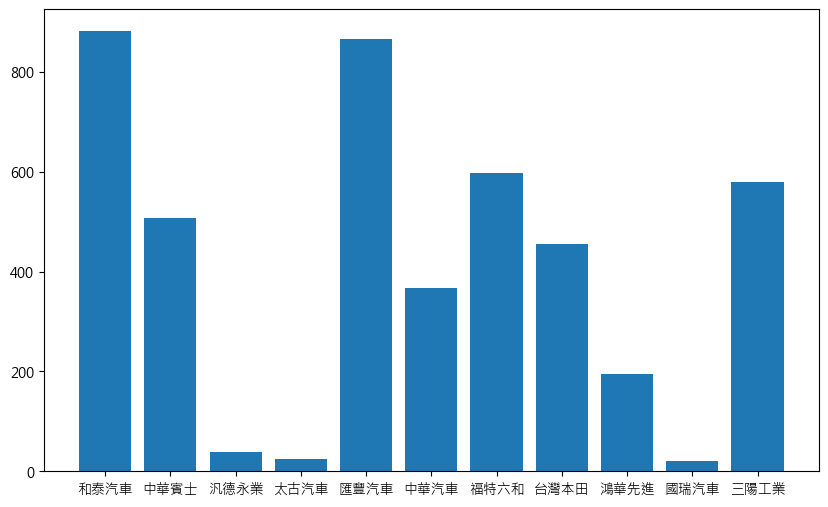

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,6))
plt.bar(x_a,y_a)
plt.show()

In [39]:
df_11salary = df_11[df_11.artContent.str.contains(dictionary["薪資"])].reset_index(drop=True)
df_11benefit = df_11[df_11.artContent.str.contains(dictionary["福利"])].reset_index(drop=True)
df_11workTime = df_11[df_11.artContent.str.contains(dictionary["工時"])].reset_index(drop=True)
df_11product = df_11[df_11.artContent.str.contains(dictionary["產品"])].reset_index(drop=True)
df_11ad = df_11[df_11.artContent.str.contains(dictionary["廣告"])].reset_index(drop=True)
df_11apply = df_11[df_11.artContent.str.contains(dictionary["人才招募"])].reset_index(drop=True)
df_11department = df_11[df_11.artContent.str.contains('品質')].reset_index(drop=True)

In [19]:
dictionary["科系專業"]

'新鮮人|畢業|出路|電機|電子|資工|機械|機電|動力機械|製造|製程|車輛工程|車輛檢測|品管|品檢|品質|品質管理|品質工程|傳產|傳統產業'

In [13]:
df_11department.to_csv("11department.csv",encoding='utf-8-sig')

In [40]:
df_11department.shape

(430, 6)

In [14]:
(df_11department[df_11department.artContent.str.contains(dictionary["科系專業"])].reset_index(drop=True)).shape

(434, 6)

In [19]:
print(df_salary.shape)
print(df_benefit.shape)
print(df_workTime.shape)
print(df_product.shape)
print(df_ad.shape)
print(df_apply.shape)
print(df_department.shape)

(7, 6)
(12, 6)
(0, 6)
(1814, 6)
(147, 6)
(59, 6)
(808, 6)


In [43]:
x = ['薪資','福利','工時','產品','廣告','人才招募','專業科目']
y1 = [df_01salary.shape[0],df_01benefit.shape[0],df_01workTime.shape[0],df_01product.shape[0],df_01ad.shape[0],df_01apply.shape[0],df_01department.shape[0]]

In [41]:
x = ['薪資','福利','工時','產品','廣告','人才招募','專業科目']
y2 = [df_02salary.shape[0],df_02benefit.shape[0],df_02workTime.shape[0],df_02product.shape[0],df_02ad.shape[0],df_02apply.shape[0],df_02department.shape[0]]

In [47]:
y3 = [df_03salary.shape[0],df_03benefit.shape[0],df_03workTime.shape[0],df_03product.shape[0],df_03ad.shape[0],df_03apply.shape[0],df_03department.shape[0]]

In [49]:
y4 = [df_04salary.shape[0],df_04benefit.shape[0],df_04workTime.shape[0],df_04product.shape[0],df_04ad.shape[0],df_04apply.shape[0],df_04department.shape[0]]

In [51]:
y5 = [df_05salary.shape[0],df_05benefit.shape[0],df_05workTime.shape[0],df_05product.shape[0],df_05ad.shape[0],df_05apply.shape[0],df_05department.shape[0]]

In [53]:
y6 = [df_06salary.shape[0],df_06benefit.shape[0],df_06workTime.shape[0],df_06product.shape[0],df_06ad.shape[0],df_06apply.shape[0],df_06department.shape[0]]

In [55]:
y7 = [df_07salary.shape[0],df_07benefit.shape[0],df_07workTime.shape[0],df_07product.shape[0],df_07ad.shape[0],df_07apply.shape[0],df_07department.shape[0]]

In [57]:
y8 = [df_08salary.shape[0],df_08benefit.shape[0],df_08workTime.shape[0],df_08product.shape[0],df_08ad.shape[0],df_08apply.shape[0],df_08department.shape[0]]

In [59]:
y9 = [df_09salary.shape[0],df_09benefit.shape[0],df_09workTime.shape[0],df_09product.shape[0],df_09ad.shape[0],df_09apply.shape[0],df_09department.shape[0]]

In [62]:
y10 = [df_10salary.shape[0],df_10benefit.shape[0],df_10workTime.shape[0],df_10product.shape[0],df_10ad.shape[0],df_10apply.shape[0],df_10department.shape[0]]

In [64]:
y11 = [df_11salary.shape[0],df_11benefit.shape[0],df_11workTime.shape[0],df_11product.shape[0],df_11ad.shape[0],df_11apply.shape[0],df_11department.shape[0]]

In [ ]:
、、、、、、、

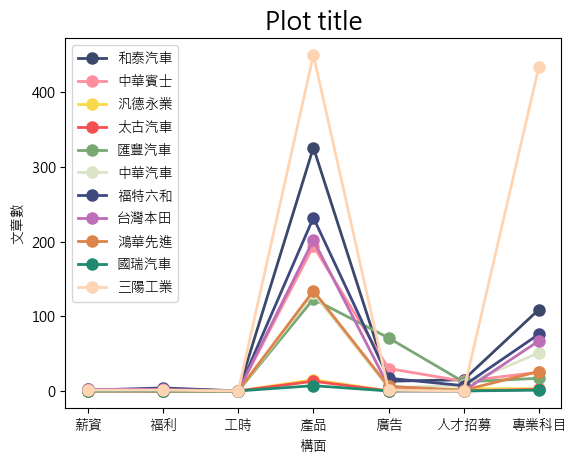

In [70]:
plt.plot(x, y1, color='#3C486B', linestyle="-", linewidth="2", markersize="16", marker=".", label="和泰汽車")
plt.plot(x, y2, color='#FF8E9E', linestyle="-", linewidth="2", markersize="16", marker=".", label="中華賓士")
plt.plot(x, y3, color='#F9D949', linestyle="-", linewidth="2", markersize="16", marker=".", label="汎德永業")
plt.plot(x, y4, color='#F45050', linestyle="-", linewidth="2", markersize="16", marker=".", label="太古汽車")
plt.plot(x, y5, color='#7AA874', linestyle="-", linewidth="2", markersize="16", marker=".", label="匯豐汽車")
plt.plot(x, y6, color='#DBE4C6', linestyle="-", linewidth="2", markersize="16", marker=".", label="中華汽車")
plt.plot(x, y7, color='#3F497F', linestyle="-", linewidth="2", markersize="16", marker=".", label="福特六和")
plt.plot(x, y8, color='#BE6DB7', linestyle="-", linewidth="2", markersize="16", marker=".", label="台灣本田")
plt.plot(x, y9, color='#DC8449', linestyle="-", linewidth="2", markersize="16", marker=".", label="鴻華先進")
plt.plot(x, y10, color='#1F8A70', linestyle="-", linewidth="2", markersize="16", marker=".", label="國瑞汽車")
plt.plot(x, y11, color='#FFD4B2', linestyle="-", linewidth="2", markersize="16", marker=".", label="三陽工業")
plt.xlabel('構面', fontsize="10") # 設定 x 軸標題內容及大小
plt.ylabel('文章數', fontsize="10") # 設定 y 軸標題內容及大小
plt.title('Plot title', fontsize="18") # 設定圖表標題內容及大小

plt.legend()
plt.show()

<Figure size 640x480 with 0 Axes>

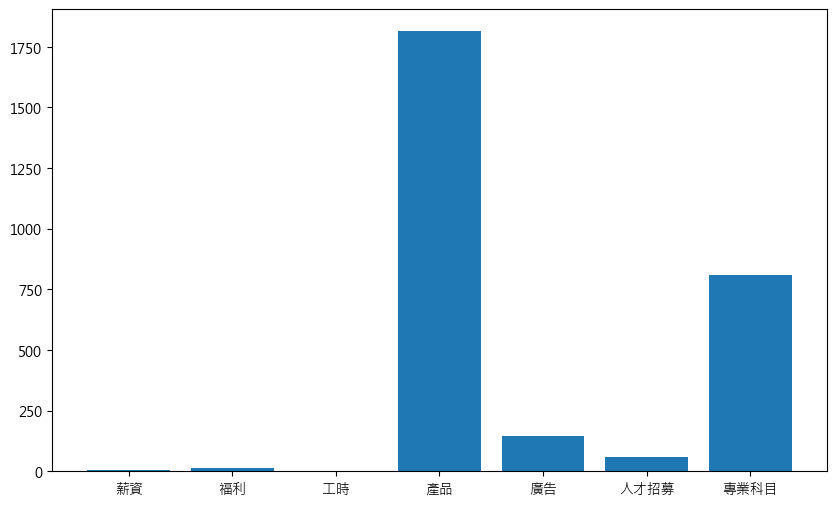

In [16]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,6))
plt.bar(x,y)
plt.show()

In [17]:
segmentation_used_note = (";", "；", "！", "!", "？", "?", "。")
def sentence_segmentation(df, target_column, segment_symboles=[]):
    regexPattern = '['+'|'.join(segment_symboles)+']'
    sentenceCheckRegexPattern = '[,|.| |\t|\n]'

    result = []
    
    for row_dict in df.to_dict(orient="records"):
        sentences = re.split(regexPattern, row_dict[target_column])
        count = 1
        for sent in sentences:
            if re.sub(sentenceCheckRegexPattern, "", sent):
                temp = row_dict.copy()
                del temp[target_column]
                temp["sentence_idx"] = str(count)
                temp["sentence"] = sent
                result.append(temp)
                count +=1
    df = pd.DataFrame(result)
    return df

### 薪資構面

In [166]:
# df_product.head()
# df_product.sample(n=10,random_state=5,axis=0)

In [15]:
df_sen = sentence_segmentation(df_salary,'artContent',list(segmentation_used_note))
df_salary['sentences'] = df_sen.groupby('artUrl', sort=False)['sentence'].apply(list).tolist()

* 斷詞

In [16]:
#設定繁體中文詞庫
jieba.set_dictionary('./dict/dict.txt.big')
#新增自定義字典
jieba.load_userdict('./dict/user_dict.txt')
#新增stop words
#jieba.analyse.set_stop_words('./dict/stop_words.txt') #jieba.analyse.extract_tags才會作用
with open('./dict/stopwords.txt',encoding="utf-8") as f:
    stopWords = [line.strip() for line in f.readlines()]

Building prefix dict from c:\D\中山\31lab\裕隆日產\dict\dict.txt.big ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.u8f690af6935baf7001a90ebf9d4408ff.cache
Loading model cost 0.835 seconds.
Prefix dict has been built succesfully.


In [17]:
def getToken(row):
    
    seg_list = jieba.lcut(row)
    seg_list = [w for w in seg_list if w not in stopWords and len(w) > 1] # 篩選不在停用字的字與字元數大於1的字詞
    return seg_list

In [18]:
df_sen['word'] =df_sen.sentence.apply(getToken)
df_sen = df_sen.explode('word') # 將word欄位展開

In [19]:
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0        萬元     9
1        汽車     7
2     speed     6
3     https     6
4        售價     5
..      ...   ...
259    油電版將     1
260      GR     1
261  TOYOTA     1
262      哪家     1
263     新紀元     1

[264 rows x 2 columns]

In [28]:
plt.rcParams['font.sans-serif']=['SimHei'] #使中文能正常顯示
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False

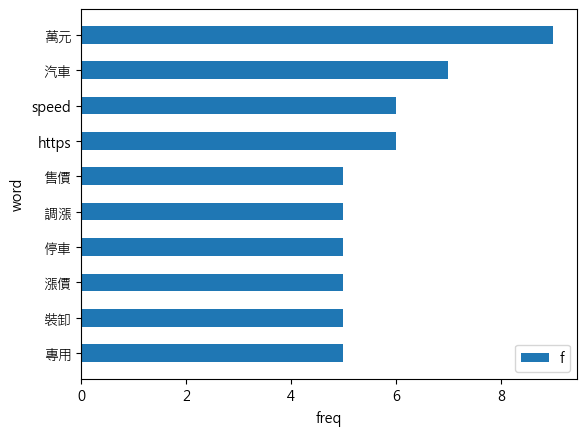

In [21]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

In [36]:
stop_word_update = stopWords + ['https','speed','et','車雲','停車','裝卸','ETtoday','Fit']

In [37]:
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]

In [38]:
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0        萬元     9
1        汽車     7
2        專用     5
3        漲價     5
4        售價     5
..      ...   ...
251     FIT     1
252    油電版將     1
253  TOYOTA     1
254      哪家     1
255     新紀元     1

[256 rows x 2 columns]

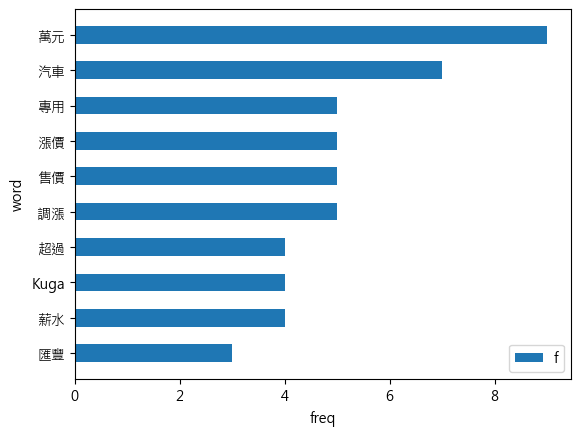

In [39]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

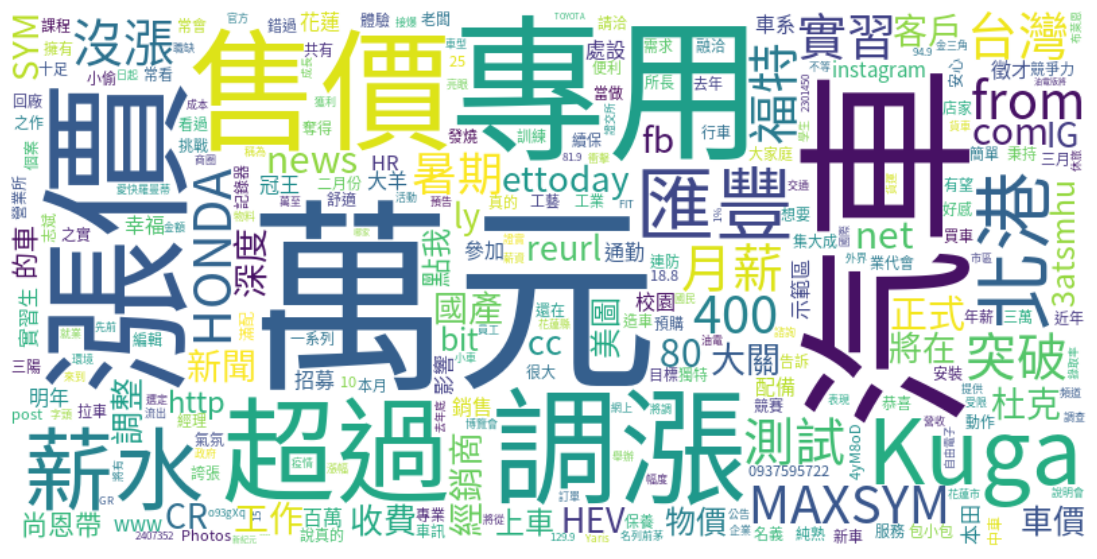

In [40]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 福利構面

In [41]:
df_benefit.shape

(12, 6)

In [42]:
df_sen = sentence_segmentation(df_benefit,'artContent',list(segmentation_used_note))
df_benefit['sentences'] = df_sen.groupby('artUrl', sort=False)['sentence'].apply(list).tolist()
df_sen['word'] =df_sen.sentence.apply(getToken)
df_sen = df_sen.explode('word') # 將word欄位展開
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0           賓士    16
1           中華    14
2           年終    11
3         Ford     8
4           台灣     7
..         ...   ...
439         掀背     1
440  Hatchback     1
441         身份     1
442         進口     1
443         元起     1

[444 rows x 2 columns]

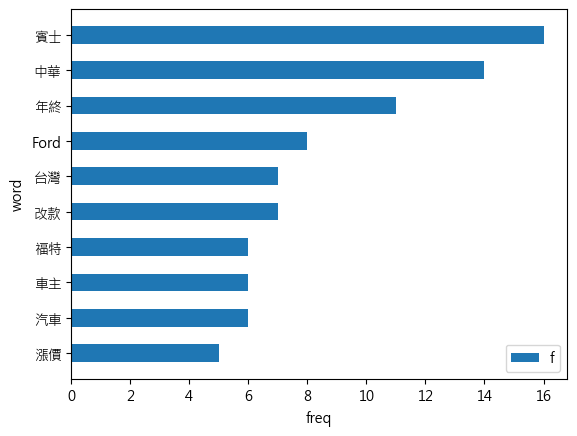

In [43]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

In [44]:
stop_word_update = stopWords + ['https']
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0           賓士    16
1           中華    14
2           年終    11
3         Ford     8
4           台灣     7
..         ...   ...
438         掀背     1
439  Hatchback     1
440         身份     1
441         進口     1
442         元起     1

[443 rows x 2 columns]

<Figure size 640x480 with 0 Axes>

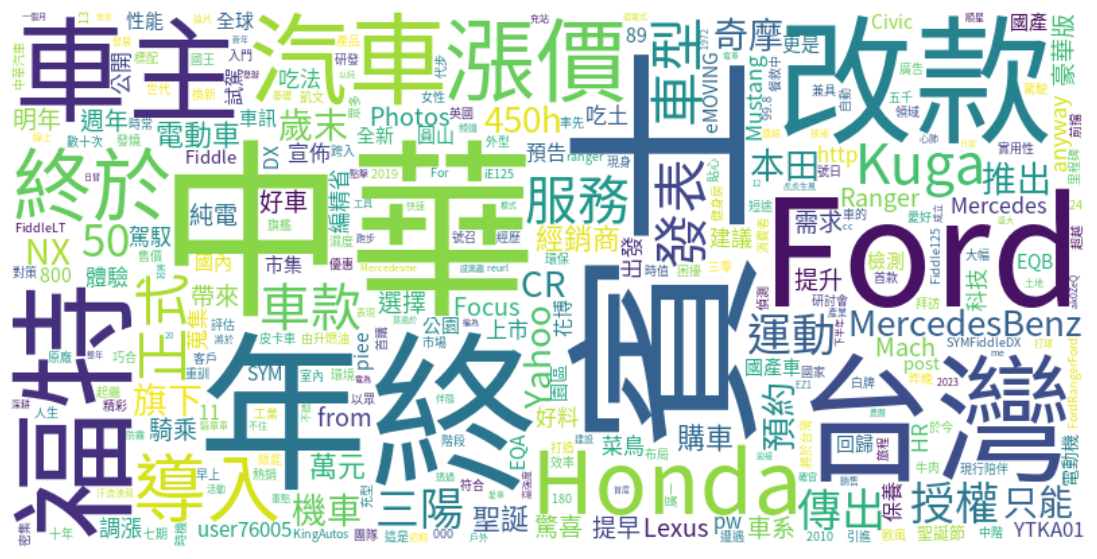

In [45]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 工時 = 0

### 產品

In [52]:
df_product.shape

(1814, 6)

In [53]:
df_sen = sentence_segmentation(df_product,'artContent',list(segmentation_used_note))
df_product['sentences'] = df_sen.groupby('artUrl', sort=False)['sentence'].apply(list).tolist()
df_sen['word'] =df_sen.sentence.apply(getToken)
df_sen = df_sen.explode('word') # 將word欄位展開
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0        三陽  2462
1        第一  2383
2        新車  1960
3       經銷商  1870
4        銷售  1753
...     ...   ...
12262    優化     1
12263  Maas     1
12264    接連     1
12265    強棒     1
12266    財經     1

[12267 rows x 2 columns]

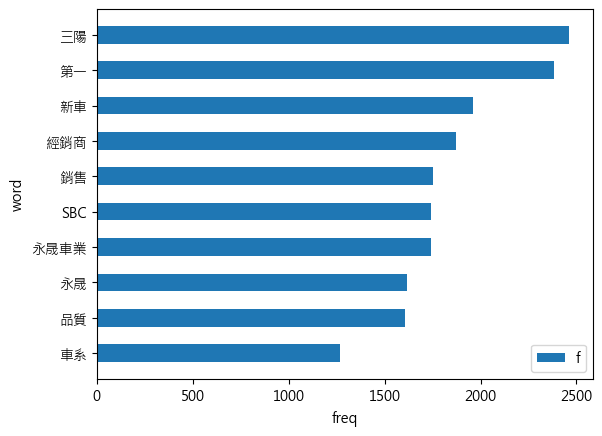

In [54]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

In [55]:
stop_word_update = stopWords + ['第一']
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0        三陽  2462
1        新車  1960
2       經銷商  1870
3        銷售  1753
4       SBC  1740
...     ...   ...
12261    長輩     1
12262  熱力四射     1
12263    相挺     1
12264    過癮     1
12265    財經     1

[12266 rows x 2 columns]

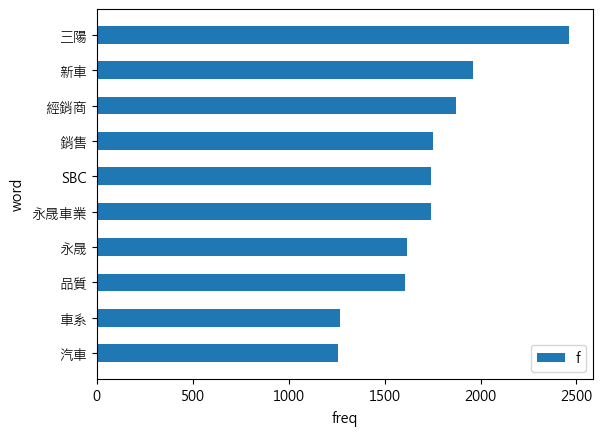

In [57]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

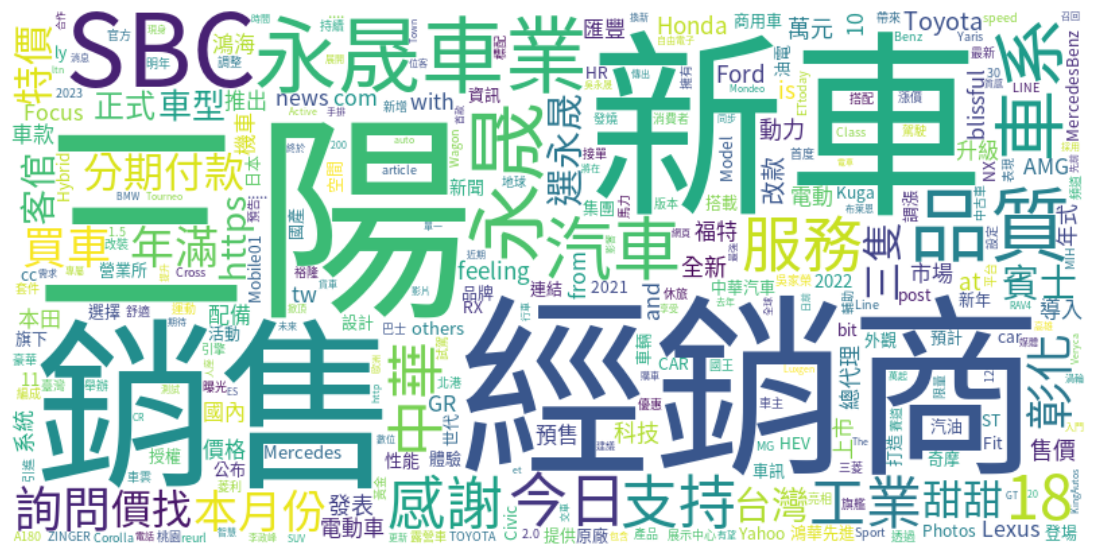

In [58]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 廣告

In [59]:
df_ad.shape

(147, 6)

In [60]:
df_sen = sentence_segmentation(df_ad,'artContent',list(segmentation_used_note))
df_ad['sentences'] = df_sen.groupby('artUrl', sort=False)['sentence'].apply(list).tolist()
df_sen['word'] =df_sen.sentence.apply(getToken)
df_sen = df_sen.explode('word') # 將word欄位展開
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0       汽車   290
1       匯豐   232
2      營業所   204
3       中華   194
4       桃園   191
...    ...   ...
2816   重量級     1
2817  加快腳步     1
2818    有破     1
2819    角色     1
2820    起跑     1

[2821 rows x 2 columns]

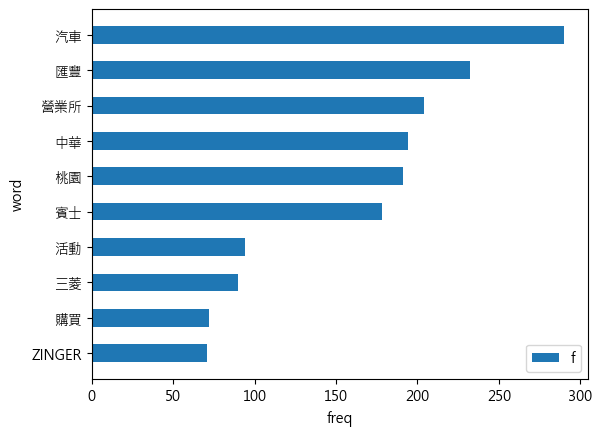

In [61]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

In [62]:
stop_word_update = stopWords + ['https','LUXGEN','NISSAN','生活館','ly','is','阿爸','bit','Luxgen','點還會','有夠','新聞網']
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0      汽車   290
1      匯豐   232
2     營業所   204
3      中華   194
4      桃園   191
...   ...   ...
2809   支出     1
2810   一大     1
2811   停車     1
2812  油資及     1
2813   起跑     1

[2814 rows x 2 columns]

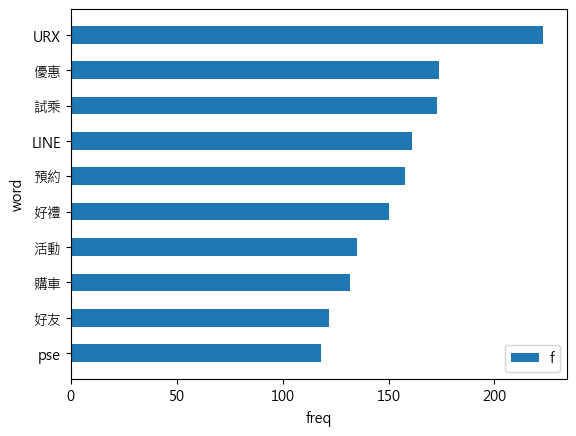

In [82]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

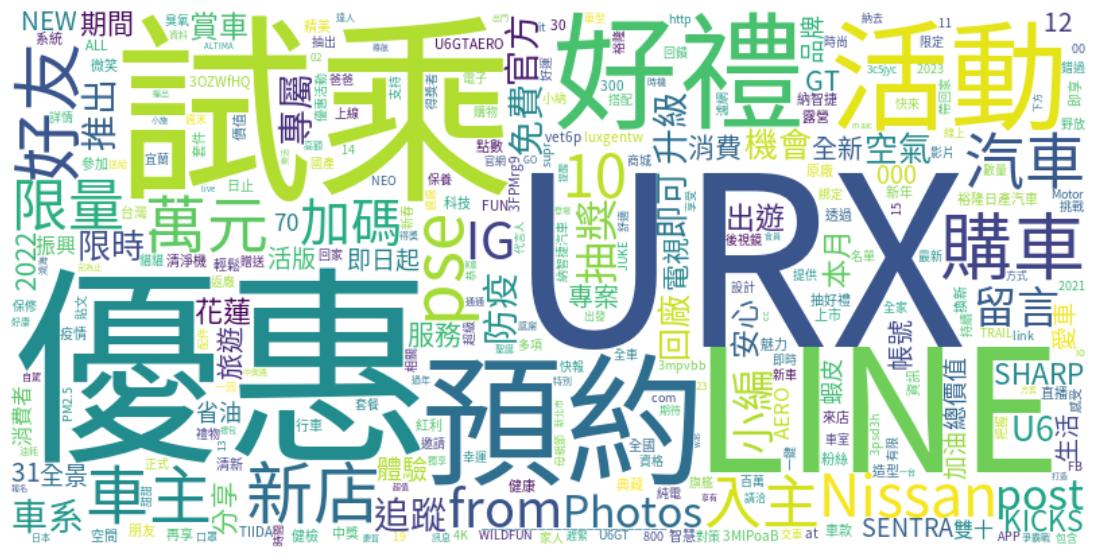

In [83]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 人才招募

In [63]:
df_apply.shape

(59, 6)

In [64]:
df_sen = sentence_segmentation(df_apply,'artContent',list(segmentation_used_note))
df_apply['sentences'] = df_sen.groupby('artUrl', sort=False)['sentence'].apply(list).tolist()
df_sen['word'] =df_sen.sentence.apply(getToken)
df_sen = df_sen.explode('word') # 將word欄位展開
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0        汽車    90
1        賓士    57
2        工作    51
3        中華    50
4     https    33
...     ...   ...
1776    說明會     1
1777     稱為     1
1778     外界     1
1779   名列前茅     1
1780     國際     1

[1781 rows x 2 columns]

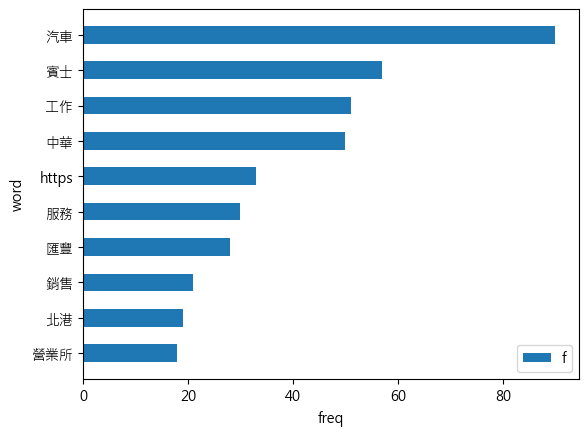

In [65]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

In [69]:
stop_word_update = stopWords + ['https','汽車','台灣']
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0       賓士    57
1       工作    51
2       中華    50
3       服務    30
4       匯豐    28
...    ...   ...
1769   說明會     1
1770    稱為     1
1771    外界     1
1772  名列前茅     1
1773    國際     1

[1774 rows x 2 columns]

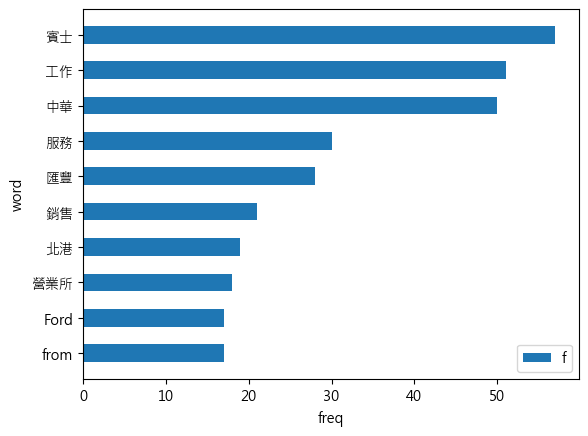

In [70]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

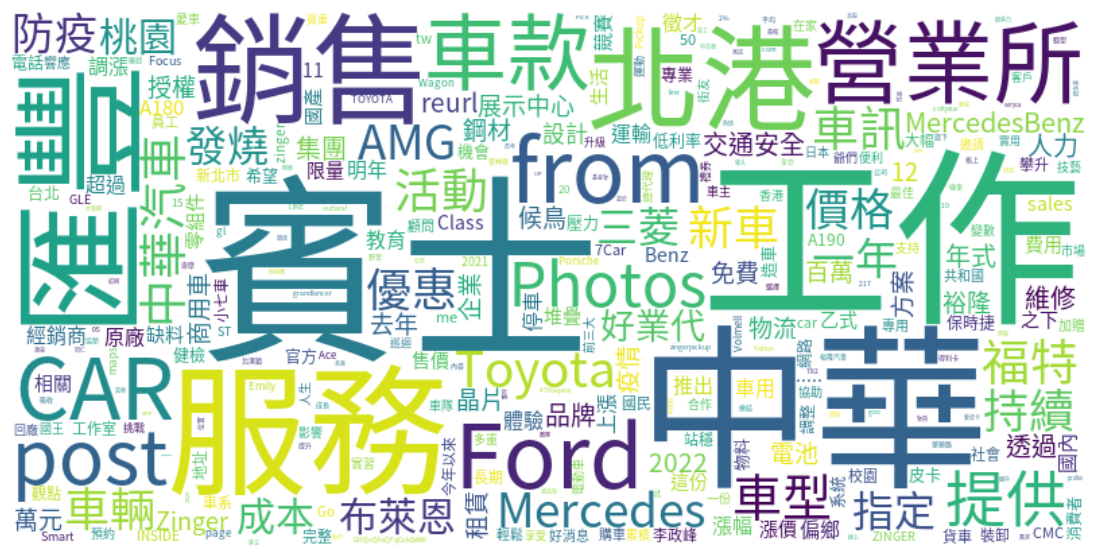

In [71]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 科系專業

In [72]:
df_department.shape

(808, 6)

In [73]:
df_sen = sentence_segmentation(df_department,'artContent',list(segmentation_used_note))
df_department['sentences'] = df_sen.groupby('artUrl', sort=False)['sentence'].apply(list).tolist()
df_sen['word'] =df_sen.sentence.apply(getToken)
df_sen = df_sen.explode('word') # 將word欄位展開
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0       三陽  2438
1       第一  2373
2      經銷商  1745
3      SBC  1717
4     永晟車業  1717
...    ...   ...
5198    用戶     1
5199    道歉     1
5200    車格     1
5201  今天上午     1
5202    一大     1

[5203 rows x 2 columns]

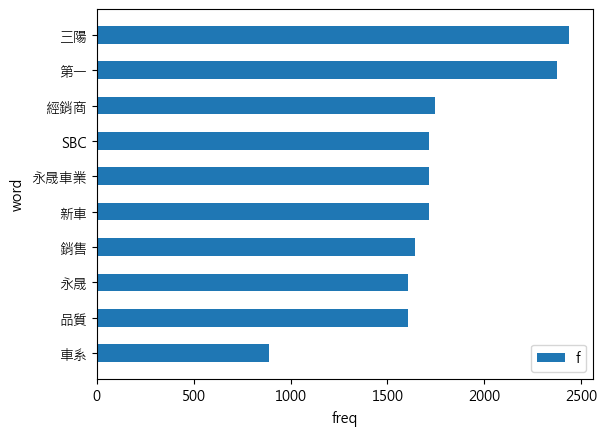

In [74]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

In [79]:
stop_word_update = stopWords + ['https','第一','LUXGEN','tw','Nissan']
for index,sentence in enumerate(df_sen['word']):
    if sentence in stop_word_update:
        df_sen = df_sen[~df_sen['word'].isin([sentence])]
ptt_articleFreq_df = pd.DataFrame(df_sen['word'].value_counts())
ptt_articleFreq_df = ptt_articleFreq_df.reset_index()
ptt_articleFreq_df.columns = ['word', 'freq']
ptt_articleFreq_df

word  freq
0       三陽  2438
1      經銷商  1745
2      SBC  1717
3     永晟車業  1717
4       新車  1716
...    ...   ...
5193    用戶     1
5194    道歉     1
5195    車格     1
5196  今天上午     1
5197    一大     1

[5198 rows x 2 columns]

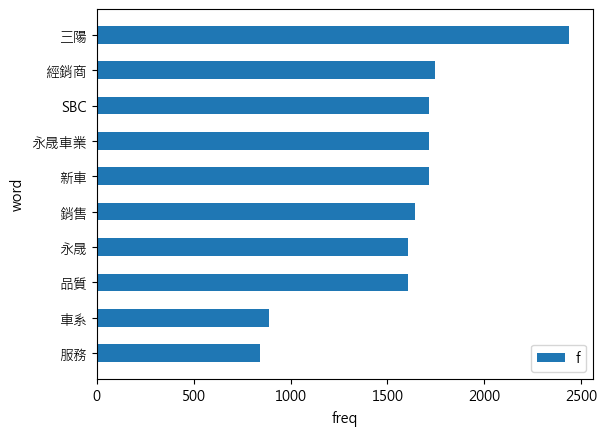

In [80]:
fig, ax = plt.subplots()
tmp = ptt_articleFreq_df['word'][:10]
tmpR = [tmp[i] for i in range(len(tmp)-1,-1,-1)]
ax.barh(tmpR,
        sorted(ptt_articleFreq_df['freq'][:10]), 
        height=0.5, 
        align='center',
        label='freq')
ax.set_ylabel('word')
ax.set_xlabel('freq')
ax.legend('freq', loc ='lower right') 

<Figure size 640x480 with 0 Axes>

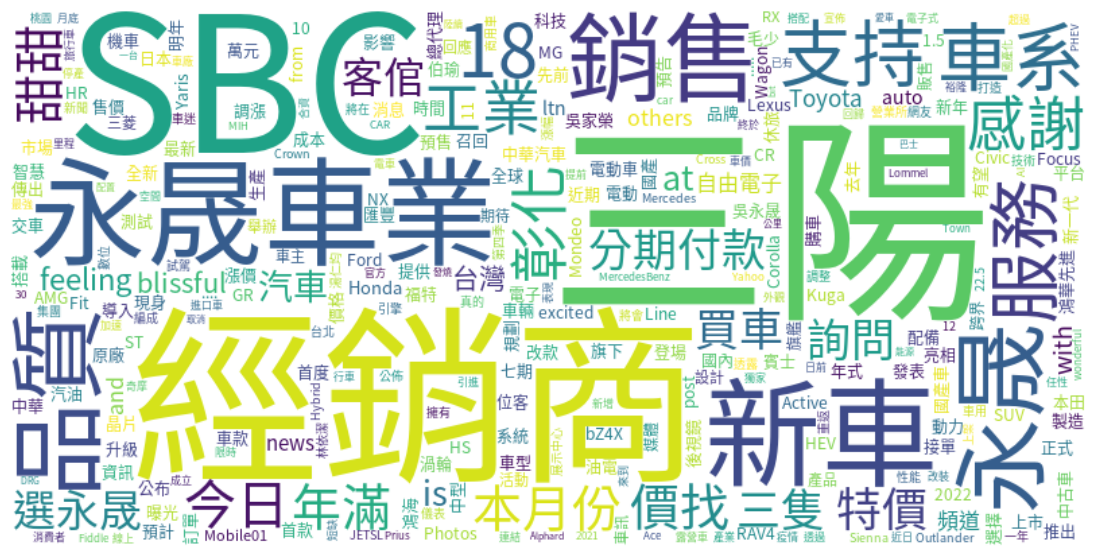

In [81]:
# Generate a word cloud image
font_path = './SourceHanSansTW-Regular.otf'
cloud = WordCloud(max_words=300, background_color="white",width=800, height = 400, font_path=font_path, colormap='viridis')
cloud.generate_from_frequencies({w[1]['word'] : int(w[1]['freq']) for w in ptt_articleFreq_df.iterrows()})
# 繪圖
plt.figure()
plt.figure(figsize=(14,7))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()